<a href="https://colab.research.google.com/github/bebeam2942/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os
from datetime import date,datetime,time
import io

In [25]:
data = pd.read_csv('/content/drive/MyDrive/dataviz_2021_data/search_request.csv')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88
...,...,...,...,...,...,...,...,...,...,...
10004352,10005225,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,2018-06-24 09:23:57.777,okhttp/3.9.0;WongnaiAndroid 8.16.6;OPPO;CPH1729,NaN,153319.0,1oaki72de48dm87jbgj2a2crgf,22,NaN,NaN
10004353,10005226,66cc94db-217a-4d8e-aa20-b1d10e17c968,2018-06-24 17:03:39.908,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,1pb7i5fe2g9hd92qbkbgh06aek,22,NaN,NaN
10004354,10005227,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,2018-06-24 19:17:55.797,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,282oq0of578c6p4q760medgd30,22,NaN,NaN
10004355,10005228,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,2018-06-24 16:53:06.067,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,21520.0,2cpkib5gr19un9fmner728bair,22,NaN,NaN


## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [ ]:
data['search_timestamp']= pd.to_datetime(data['search_timestamp'],dayfirst=True,errors ='coerce')
data

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88
...,...,...,...,...,...,...,...,...,...,...
10004352,10005225,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,2018-06-24 09:23:57.777,okhttp/3.9.0;WongnaiAndroid 8.16.6;OPPO;CPH1729,NaN,153319.0,1oaki72de48dm87jbgj2a2crgf,22,NaN,NaN
10004353,10005226,66cc94db-217a-4d8e-aa20-b1d10e17c968,2018-06-24 17:03:39.908,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,1pb7i5fe2g9hd92qbkbgh06aek,22,NaN,NaN
10004354,10005227,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,2018-06-24 19:17:55.797,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,282oq0of578c6p4q760medgd30,22,NaN,NaN
10004355,10005228,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,2018-06-24 16:53:06.067,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,21520.0,2cpkib5gr19un9fmner728bair,22,NaN,NaN


## Bar char (กราฟแท่ง)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ wed Wongnai.com เพื่อค้นหาร้านอาหารในแต่ละวัน

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Text(0.5, 1.0, 'กราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ในแต่ละวัน')

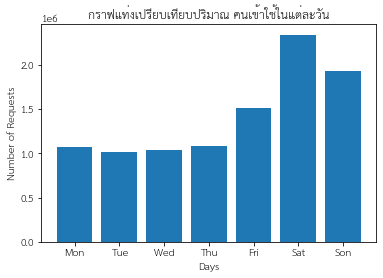

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 1].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 2].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 3].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 4].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 5].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                      ], tick_label = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']);
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('กราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ในแต่ละวัน')

Grouped bar chart

แสดงปริมาณคนเข้าเว็บในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11.00-12.00 กับ 23.00-24.00

In [ ]:
data[data['search_timestamp'].dt.dayofweek == 0
     & (data['search_timestamp'].dt.time < time(hour=12)) 
     & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0] #

1076297

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']

In [ ]:
import numpy as np

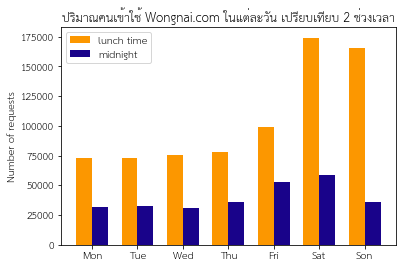

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,b4lunch, width, label='lunch time',color = '#fc9700')  #input ตัวแรกคือตำแหน่งในแนวแกนx(ตามด้วยx-width/2 คือกำหนดความกว้าง)
rects2 = ax.bar(x + width/2,b4midnight, width, label='midnight',color = '#19038a') #ตามด้วยอีกกราฟที่ต้องการเปรียบเทียบ

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

### Stacked bar chart

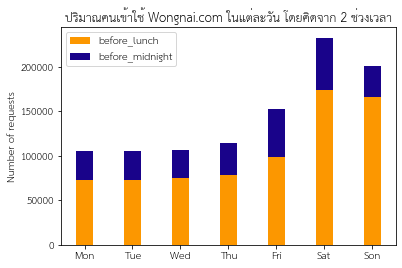

In [ ]:
#ถ้ารวมปริมาณการสั่งอาหารระหว่างช่วงเวลา กับ ช่วงวัน อันไหนมากกว่ากัน
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels,b4lunch, width,label='before_lunch',color = '#fc9700')
ax.bar(labels,b4midnight, width,bottom=b4lunch,   #bottomคือการบอกว่าเริ่มจากตรงไหน
       label='before_midnight',color = '#19038a')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

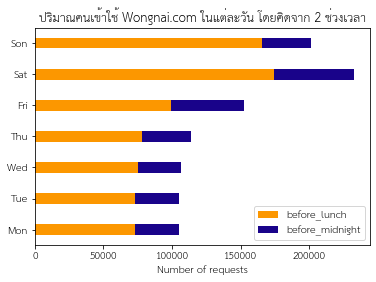

In [ ]:

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,b4lunch, width,label='before_lunch',color = '#fc9700')
ax.barh(labels,b4midnight, width,left=b4lunch,   #bottomคือการบอกว่าเริ่มจากตรงไหน
       label='before_midnight',color = '#19038a')

ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

In [ ]:
# เช็คชื่อ โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน wongnai.com 2ช่วงเวลา โดยให้กราฟแสดงสัดส่วนของคนใช้งานในแต่ละวันด้วย


In [ ]:
labels2 = ['b4lunch','b4midnigh']

ValueError: ignored

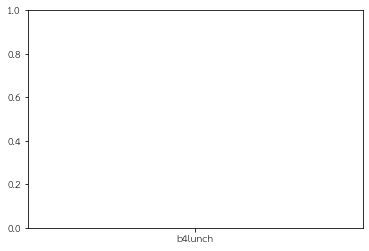

In [ ]:
time = ['b4lunch','b4midnigh']
#ลองให้ค่าแต่ละวัน จริงๆต้องรันเวลาในแต่ละวัน
Mon= np.array([10,7,10,6,6])
Tue = np.array([14,10,8,8,6])
Wed = np.array([14,14,11,9,8])
Thu = np.array([10,7,10,6,6])
Fri = np.array([14,10,8,8,6])
Sat = np.array([14,14,11,9,8])
Son = np.array([14,14,11,9,8])
 
plt.bar(labels2,Mon, width=0.6, label='Mon', color='yellow',bottom=Son+Sat+Fri+Thu+Wed+Tue)
plt.bar(labels2,Tue, width=0.6, label='Tue', color='pink',bottom=Son+Sat+Fri+Thu+Wed)
plt.bar(labels2,Wed, width=0.6, label='Wed', color='green',bottom=Son+Sat+Fri+Thu)
plt.bar(labels2,Thu, width=0.6, label='Thu', color='orange',bottom=Son+Sat+Fri)
plt.bar(labels2,Fri, width=0.6, label='Fri', color='purple',bottom=Son+Sat)
plt.bar(labels2,Sat, width=0.6, label='Sat', color='blue',bottom=Son)
plt.bar(labels2,Son, width=0.6, label='Son', color='red')
 

plt.ylabel("'Number of requests")
plt.xlabel("'time")
plt.title("'ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา")
plt.show()

### Histogram number_of_result

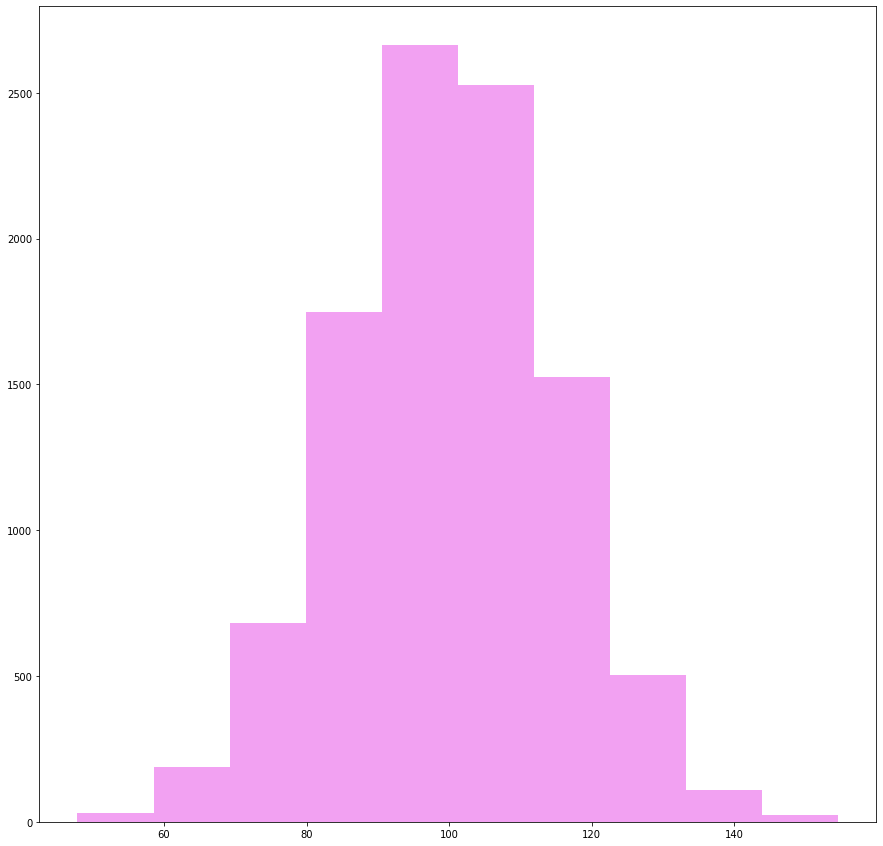

In [26]:
import numpy as np
from matplotlib import  pyplot as plt

np.random.seed(2021) 
mu, sigma =100,15
X = mu + sigma * np.random.randn(10000)

plt.hist(X,10,facecolor = 'violet',alpha=0.75);

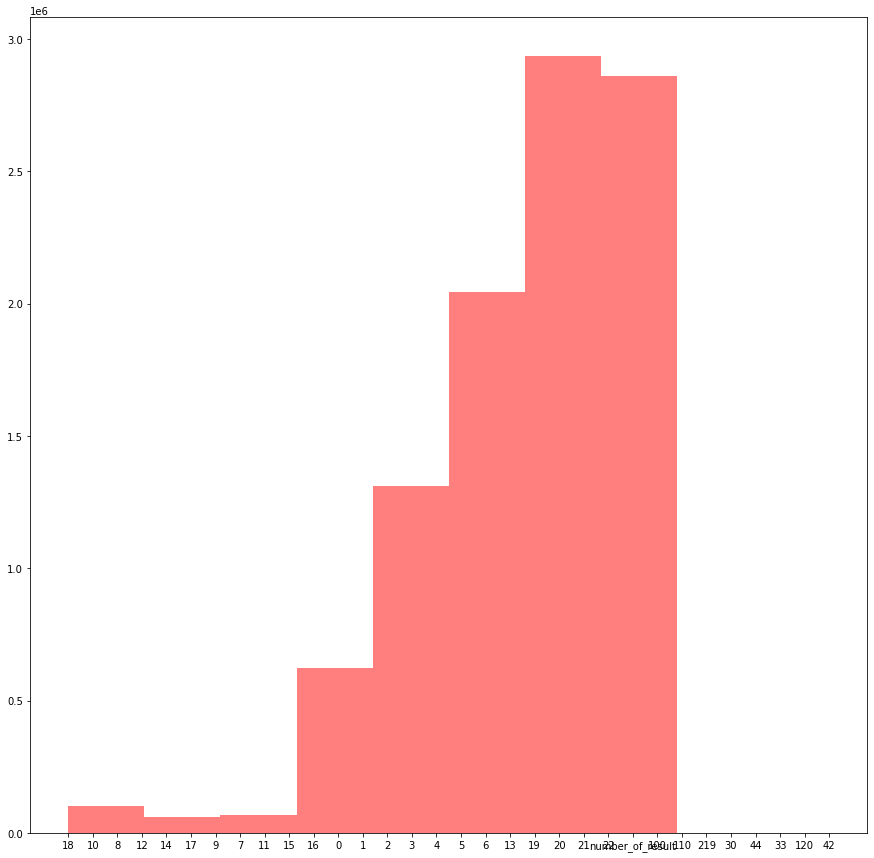

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.5)  #ต้องจัดการตัวหนังสือออก 

### แก้ปัญหาแกน X ที่เรียงข้อมูลผิด

In [28]:
data.dtypes #จะเห็นได้ว่า number_of_result   เป็น object แปรว่ามีตัวแปรหลายประเภทอยู่ด้วยกัน

Unnamed: 0            int64
search_id            object
search_timestamp     object
user_agent           object
q                    object
user_id             float64
session_id           object
number_of_result     object
lat                  object
long                 object
dtype: object

### เรียกดู data type ของตัวแปร

In [29]:
type(data['number_of_result'][0])

int

In [30]:
new_type = data['number_of_result'].astype('int32') #เช็คว่าตัวไหนที่ไม่เป็น int

ValueError: ignored

### ลบ recode ที่มีค่าใน column 'number_of_result' เป็น number_of_result

In [31]:
data[data['number_of_result']=='number_of_result'] #หาว่าอยู่columnไหน เผื่อดรอปทิ้ง

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,search_timestamp,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [32]:
data.drop(1000016,inplace=True)

In [34]:
new_type = data['number_of_result'].astype('int32')

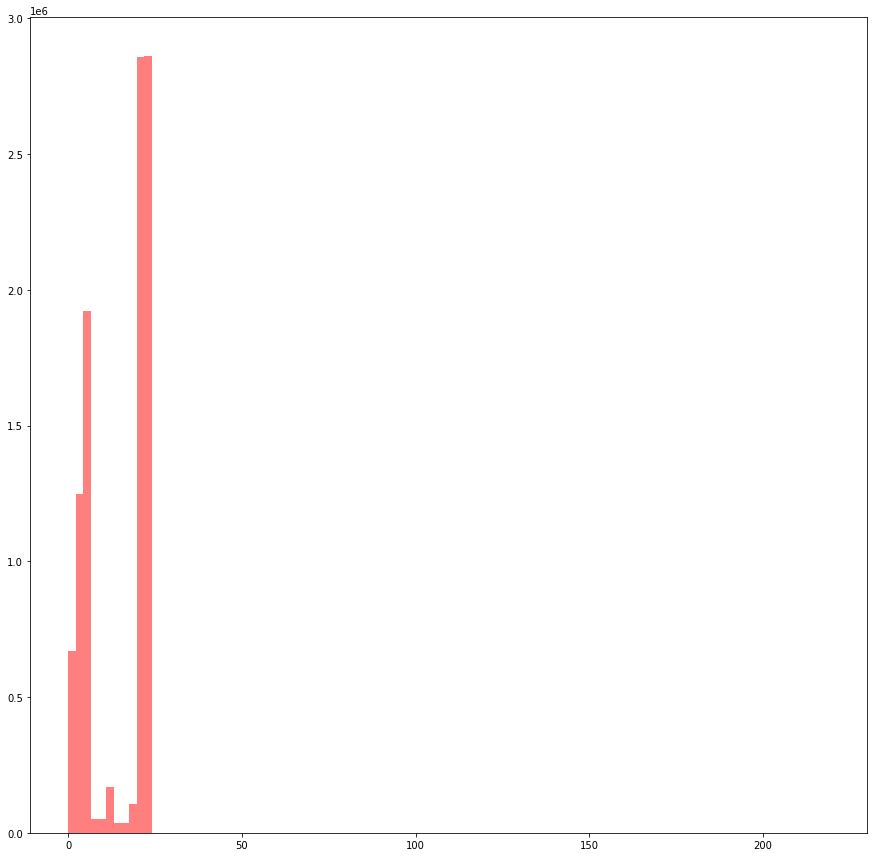

In [35]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.5)  

In [36]:
# ลบ Outlier 
new_type_nooutlier = new_type[new_type < 25]

In [38]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

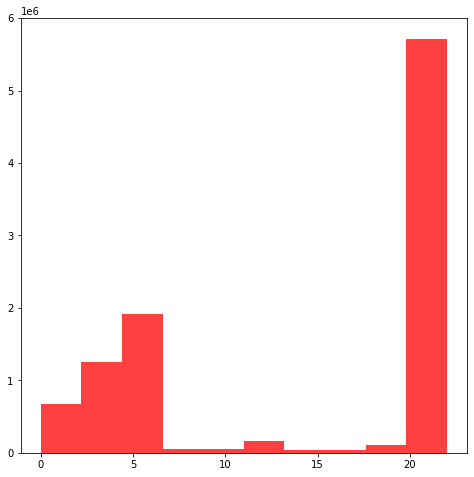

In [39]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

# Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [43]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [44]:
output[0][-1]

5717238.0

In [45]:
sum(output[0][:-1])

4287104.0

## Treemap

In [47]:
!pip install squarify 

In [48]:
import matplotlib.pyplot as plt
import squarify 

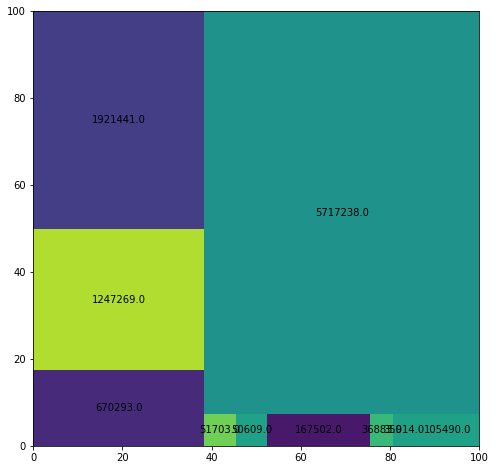

In [50]:
squarify.plot(output[0],value=output[0]) #เอาปริมาณความถี่มาใส่ในพื้นที่4เหลี่ยมเผื่อดูว่าพื้นที่ไหนมีเยอะก็แปรว่าปริมาณเยอะ 

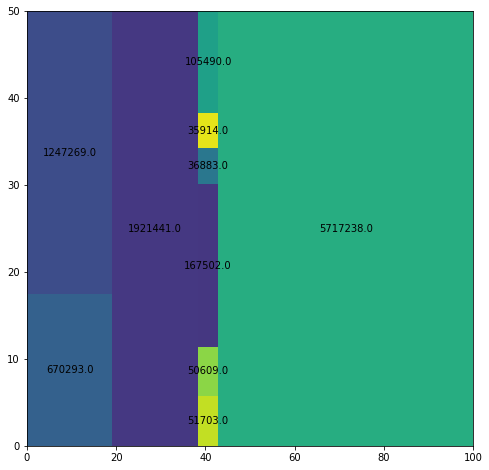

In [51]:
squarify.plot(output[0],value=output[0],norm_y=50)  #ลดแกนyให้สั้นลงเผื่อให้พื้นที่อื่นไปอยู่รวมกันด้านเดียว

In [ ]:
#เอาพื้นที่ ที่ใหญ่ที่สุด มาเปรียบเทียบกับพื้นที่อื่นๆรวมกัน


In [ ]:
import plotly.express as px
df = px.data.tips()
df["all"] = "all" # in order to have a single root node
fig = px.treemap(df, path=['all', 'sex', 'day', 'time'], values='total_bill', color='day')
fig.show()

## Radar Chart

In [ ]:
https://jingwen-z.github.io/data-viz-with-matplotlib-series8-radar-chart/

In [52]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()